### ETFs utilizados no Estudo

**BOVA11:** replica o Índice Bovespa

**SMAL11:** replica o Índice de Small Caps

**IVVB11:** replica o Índice Americano S&P500

### Configuração Inicial

In [ ]:
!pip install -q -U plotly

In [ ]:
!pip install -q investpy

In [ ]:
import pandas as pd
import investpy as inv

import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.plotting.backend = 'plotly'

### Obtendo os Dados

In [ ]:
inv.get_etfs_list('brazil')

['Ishares Ibovespa',
 'It Now Ibovespa Fundo De Indice',
 'ETF Bradesco Ibovespa Fdo De Indice',
 'XP MALLS FDO INV IMOB FII',
 'iShares BM&FBOVESPA Small Cap',
 'Fundo de Invest Ishares SP 500',
 'Malls Brasil Plural Fundo De Investimento Imobilia',
 'Fdo Inv Imob VBI Logístico',
 'It Now SP500 TRN',
 'General Shopping e Outlets do Brasil Fundo de Inve',
 'It Now PIBB IBrX-50',
 'Fundo de Investimento Imobiliario FII UBS BR Receb',
 'It Now IDIV',
 'It Now IFNC',
 'Fundo de FI Imobiliario Kinea FII',
 'FI Imobiliario - Ourinvest Fundo de Fundos',
 'iShares IBrX Brasil',
 'BB SP Dividendos',
 'It Now IMAT',
 'iShares Carbono Eficiente (ICO2) Brasil',
 'Caixa Rio Bravo Fundo de Fundos de Investimento Im',
 'It Now IGCT',
 'CAIXA Ibovespa',
 'It Now ISE',
 'Votorantim Securities Master FII-FII',
 'Brazil Realty Fundo de Investimento Imobiliario FI',
 'Loft I - Fdo Inv Imob']

In [ ]:
etfs = ['Ishares Ibovespa', 'iShares BM&FBOVESPA Small Cap', 'Fundo de Invest Ishares SP 500']

In [ ]:
data_inicio = '30/12/2014'
data_fim    = '19/04/2021'

In [ ]:
ibov = inv.get_index_historical_data('Bovespa', 'brazil', 
                                          from_date=data_inicio, 
                                          to_date=data_fim)[['Close']].pct_change().dropna()
ibov.columns = ['ibov']

In [ ]:
prices = pd.DataFrame(columns=etfs)

for etf in etfs:
  try:
    ativo = inv.get_etf_historical_data(etf, 'brazil', 
                                          from_date=data_inicio, 
                                          to_date=data_fim)['Close']
    prices[etf] = ativo
  except:
    print(f'Não foi possivel obter cotações de {etf}')
    prices.drop(etf, axis=1, inplace=True)

In [ ]:
prices.columns = ['BOVA11', 'SMAL11', 'IVVB11']

In [ ]:
prices

,BOVA11,SMAL11,IVVB11
Date,,,
2014-12-30,48.54,53.11,55.39
2015-01-02,47.26,52.02,55.80
2015-01-05,46.32,50.55,55.75
2015-01-06,46.58,50.00,54.85
2015-01-07,48.15,51.25,55.17
...,...,...,...
2021-04-13,114.67,140.07,257.20
2021-04-14,115.60,140.50,254.29
2021-04-15,116.20,140.91,254.95


In [ ]:
retornos = prices.pct_change().dropna()

In [ ]:
retornos

,BOVA11,SMAL11,IVVB11
Date,,,
2015-01-02,-0.026370,-0.020523,0.007402
2015-01-05,-0.019890,-0.028258,-0.000896
2015-01-06,0.005613,-0.010880,-0.016143
2015-01-07,0.033705,0.025000,0.005834
2015-01-08,0.007477,0.014634,0.011419
...,...,...,...
2021-04-13,0.002360,0.000500,0.002573
2021-04-14,0.008110,0.003070,-0.011314
2021-04-15,0.005190,0.002918,0.002595


### Calculando as Carteiras

|Carteira | BOVA11|SMAL11|IVVB11|
|---:|:---:|:---:|:---:|
carteira 1 | 50% | 0% | 50%|
carteira 2 |  0% | 50%| 50%|
carteira 3 | 50% | 50%|  0%|

In [ ]:
# BOVA11 | SMAL11 | IVVB11
pesos = [[0.5, 0.0, 0.5],       
         [0.0, 0.5, 0.5],
         [0.5, 0.5, 0.0]]

In [ ]:
carteiras = pd.DataFrame()

for i, peso in enumerate(pesos):
  carteiras[f'carteira {i+1}'] =  retornos @ peso

carteiras = pd.concat([carteiras, ibov, retornos], axis=1)

In [ ]:
carteiras

,carteira 1,carteira 2,carteira 3,ibov,BOVA11,SMAL11,IVVB11
Date,,,,,,,
2015-01-02,-0.009484,-0.006561,-0.023447,-0.029899,-0.026370,-0.020523,0.007402
2015-01-05,-0.010393,-0.014577,-0.024074,-0.020519,-0.019890,-0.028258,-0.000896
2015-01-06,-0.005265,-0.013512,-0.002634,0.010188,0.005613,-0.010880,-0.016143
2015-01-07,0.019770,0.015417,0.029353,0.030458,0.033705,0.025000,0.005834
2015-01-08,0.009448,0.013027,0.011055,0.009712,0.007477,0.014634,0.011419
...,...,...,...,...,...,...,...
2021-04-13,0.002466,0.001536,0.001430,0.004085,0.002360,0.000500,0.002573
2021-04-14,-0.001602,-0.004122,0.005590,0.008362,0.008110,0.003070,-0.011314
2021-04-15,0.003893,0.002757,0.004054,0.003375,0.005190,0.002918,0.002595


In [ ]:
carteiras_normalizadas = (1 + carteiras.iloc[1:]).cumprod()
carteiras_normalizadas.iloc[0] = 1

In [ ]:
carteiras_normalizadas

,carteira 1,carteira 2,carteira 3,ibov,BOVA11,SMAL11,IVVB11
Date,,,,,,,
2015-01-05,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2015-01-06,0.984397,0.972108,0.973356,0.989460,0.985612,0.961169,0.982975
2015-01-07,1.003858,0.987095,1.001926,1.019597,1.018832,0.985198,0.988710
2015-01-08,1.013342,0.999953,1.013003,1.029499,1.026449,0.999616,1.000000
2015-01-09,0.993572,0.980930,0.993030,1.006762,1.005713,0.980392,0.981183
...,...,...,...,...,...,...,...
2021-04-13,3.622323,3.840157,2.598392,2.459115,2.426365,2.692618,4.609319
2021-04-14,3.616520,3.824328,2.612917,2.479678,2.446043,2.700884,4.557168
2021-04-15,3.630599,3.834871,2.623510,2.488047,2.458739,2.708766,4.568996


### Gráficos

In [ ]:
(carteiras_normalizadas*100).plot(title='Comparativo das Carteiras', 
                                  labels=dict(Date="Data", value="Preço", variable="Carteiras"))

|Carteira | BOVA11|SMAL11|IVVB11|
|---:|:---:|:---:|:---:|
carteira 1 | 50% | 0% | 50%|
carteira 2 |  0% | 50%| 50%|
carteira 3 | 50% | 50%|  0%|

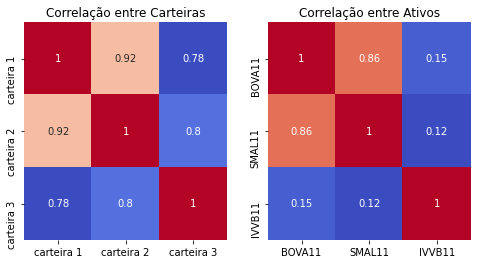

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4))

ax1.set_title('Correlação entre Carteiras')
sns.heatmap(carteiras.corr().iloc[:3,:3], 
            annot=True, cmap='coolwarm', 
            ax=ax1, cbar=False);

ax2.set_title('Correlação entre Ativos')
sns.heatmap(carteiras.corr().iloc[4:,4:], 
            annot=True, cmap='coolwarm',
            cbar=False, ax=ax2);


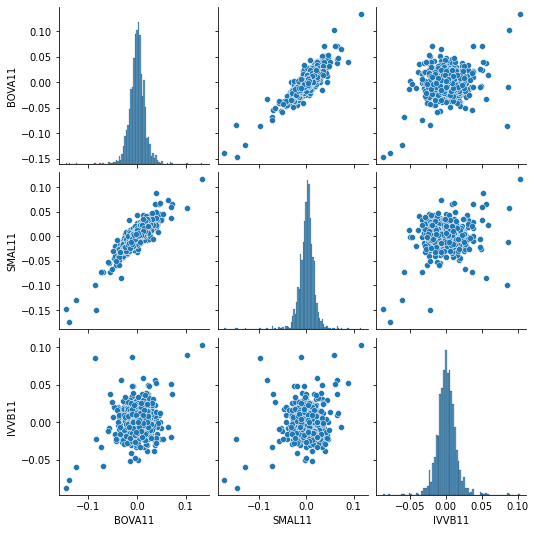

In [ ]:
sns.pairplot(carteiras.iloc[:, 4:]);

### Resumo dos Resultados

In [ ]:
resultados = pd.DataFrame(index=['retorno total', 'volatilidade'], columns=carteiras.columns)
resultados.loc['volatilidade']  = carteiras.std()*252**0.5
resultados.loc['retorno total'] = carteiras_normalizadas.iloc[-1] - 1

In [ ]:
resultados.applymap(lambda x: f'{x:.1%}')

,carteira 1,carteira 2,carteira 3,ibov,BOVA11,SMAL11,IVVB11
retorno total,260.9%,282.9%,163.8%,149.3%,146.2%,173.5%,351.0%
volatilidade,18.7%,18.7%,26.5%,27.0%,27.2%,27.8%,21.8%


|Carteira | BOVA11|SMAL11|IVVB11|
|---:|:---:|:---:|:---:|
carteira 1 | 50% | 0% | 50%|
carteira 2 |  0% | 50%| 50%|
carteira 3 | 50% | 50%|  0%|